In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
print(words[:8])
print(len(words))

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']
32033


In [5]:
# building the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [138]:
# build the dataset
block_size = 3 # context length: how many chars do we take to predict the next one?
X, Y = [], []
# for w in words[:5]:
for w in words:
    # print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append
        
X = torch.tensor(X)
Y = torch.tensor(Y)

In [139]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [220]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
    X, Y = [], []
    for w in words:

        #print(w)
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix] # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [11]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [12]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [13]:
C = torch.randn((27, 2))

In [14]:
C

tensor([[-0.8991,  0.2304],
        [-0.3806,  1.1378],
        [-0.3438, -0.3785],
        [-0.4775,  1.8713],
        [-0.4804, -0.3575],
        [ 1.0493, -0.5696],
        [-0.2922, -0.2832],
        [ 0.3635,  0.6309],
        [-0.9095,  2.9389],
        [-1.1596, -0.2117],
        [ 0.0874, -1.2836],
        [ 1.7885,  0.9464],
        [ 0.0192, -0.9209],
        [-0.4295,  1.2617],
        [ 0.9781,  1.2581],
        [ 1.9899,  1.1928],
        [ 0.0425,  0.6879],
        [-0.3377,  0.0631],
        [-0.2821, -0.0702],
        [-0.6072, -0.0665],
        [ 1.0581, -1.6443],
        [ 0.1788,  1.1790],
        [-1.1378,  1.0974],
        [-0.2729,  0.6342],
        [ 0.5707, -1.2235],
        [-0.6851,  0.5268],
        [-1.3874, -2.3149]])

In [21]:
# the same things:
print(C[5]) # faster
print(F.one_hot(torch.tensor(5), num_classes=27).float() @ C)

tensor([ 1.0493, -0.5696])
tensor([ 1.0493, -0.5696])


In [23]:
C[X].shape

torch.Size([32, 3, 2])

In [24]:
X[13, 2]

tensor(1)

In [25]:
C[X][13, 2]

tensor([-0.3806,  1.1378])

In [26]:
C[1]

tensor([-0.3806,  1.1378])

In [28]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [29]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [32]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [36]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [40]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [43]:
a = torch.arange(18)
a.shape

torch.Size([18])

In [44]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [47]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [55]:
emb.view(32, 6) == torch.cat(torch.unbind(emb, 1), 1) 

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [68]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
# h = torch.tanh(emb.view(emb.shape[0], 6) @ W1 + b1) # same
print(h.shape)
print(h)

torch.Size([32, 100])
tensor([[ 0.5790,  0.9998,  0.5511,  ..., -0.9812, -0.8333,  0.5841],
        [ 0.9775,  0.9386,  0.5584,  ..., -0.9983,  0.4220,  0.9993],
        [ 0.3078,  0.9564, -0.2857,  ..., -0.9963, -0.9544, -0.1923],
        ...,
        [ 0.3053,  0.9999, -0.9511,  ...,  0.9999, -1.0000, -0.9256],
        [ 0.6851,  0.9999,  0.4433,  ..., -0.7993, -1.0000, -0.8184],
        [ 0.2701,  0.8355, -0.8906,  ..., -0.7127, -0.9999,  0.9338]])


In [69]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [72]:
logits = h @ W2 + b2
print(logits.shape)
print(logits)

torch.Size([32, 27])
tensor([[-1.1442e+01, -7.3908e+00,  3.8207e+00,  1.1016e+00, -8.1932e-01,
         -1.2690e+01,  3.4642e+00,  3.7410e+00,  3.5993e-01, -4.6401e+00,
          6.4095e+00, -2.4524e+00,  1.1534e+01,  6.5221e+00,  1.0438e+01,
         -1.1429e+00,  3.3559e+00,  1.9384e+00, -4.1197e+00,  1.3139e+01,
          7.5327e-01,  6.8080e+00, -1.4743e+01, -2.4243e+00, -4.5628e+00,
          5.7433e+00,  8.2543e-01],
        [-1.1018e+01, -9.8390e+00, -1.3232e+00, -2.0605e+01,  4.7938e+00,
         -2.1647e+00,  3.2928e-01,  7.1325e+00,  2.7626e+00, -2.2788e+00,
          4.2037e-01, -5.8886e+00,  3.8016e-01, -3.7647e+00,  9.6511e+00,
          6.9506e+00, -2.5687e+00, -8.5003e-01, -5.4818e+00, -1.3322e+00,
          1.9466e+00, -1.6516e+00, -5.6854e+00,  1.2944e-01,  1.3157e+00,
          5.1702e+00, -3.5205e+00],
        [-3.0762e+00, -3.3062e+00,  5.6552e+00, -2.6227e+00, -9.1022e+00,
         -2.0167e+01, -1.2415e+01, -1.1028e+01, -8.0701e+00, -1.3086e+01,
         -1.0028e+0

In [73]:
counts = logits.exp()

In [82]:
prob = counts / counts.sum(1, keepdims=True)
print(prob.shape)
print(prob[0].sum())

torch.Size([32, 27])
tensor(1.0000)


In [83]:
prob[torch.arange(32), Y]

tensor([4.7599e-12, 1.2759e-06, 9.9445e-01, 7.3539e-10, 1.7468e-06, 4.9276e-07,
        2.1059e-08, 1.2534e-06, 9.9832e-01, 2.8278e-10, 2.1681e-11, 5.7102e-10,
        9.5329e-10, 1.7880e-13, 2.6270e-12, 1.6138e-07, 1.4922e-08, 9.7574e-01,
        3.4205e-10, 2.1807e-05, 4.7734e-12, 2.7969e-07, 4.0916e-03, 1.1108e-06,
        1.0424e-10, 7.8524e-01, 1.4382e-05, 2.0816e-11, 1.4266e-08, 3.4127e-05,
        1.6057e-12, 4.3812e-11])

In [84]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(16.5391)

In [85]:
# --------------- now made respectable :) ---------------

In [239]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [271]:
g = torch.Generator().manual_seed(2147483647)  # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [272]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [128]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdim=True)
# loss = -prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
print(loss)

# Why is cross_entropy better?
# 1. forward pass and backward pass much more faster
# 2. doesn't have this problem:
logits = torch.tensor([-100, -3, 0, 100]).float()
counts = logits.exp()
probs = counts / counts.sum()
print(probs)

tensor(17.7697)
tensor([0., 0., 0., nan])


In [273]:
for p in parameters:
    p.requires_grad = True

In [274]:
learning_rate_exponent = torch.linspace(-3, 0, 1000)
learning_rates = 10**learning_rate_exponent
learning_rate_i = []
loss_i = []
step_i = []

In [275]:
for i in range(200_000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32, ))
    minibatch_Xtr = Xtr[ix]
    minibatch_Ytr = Ytr[ix]
    # forward pass
    emb = C[minibatch_Xtr] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, minibatch_Ytr)
    # print(loss.item())
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # update params
    learning_rate = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -learning_rate * p.grad
    # track stats
    # learning_rate_i.append(learning_rate)
    step_i.append(i)
    loss_i.append(loss.log10().item())
print(loss.item())

1.6424773931503296


In [276]:
def print_loss(x, y):
    emb = C[x] # (32, 3, 2)
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
    logits = h @ W2 + b2 # (32, 27)
    loss = F.cross_entropy(logits, y)
    print(loss)

print_loss(Xtr, Ytr)
print_loss(Xdev, Ydev)
# print(logits.max(1))
# print(Y)

tensor(2.1140, grad_fn=<NllLossBackward0>)
tensor(2.1588, grad_fn=<NllLossBackward0>)


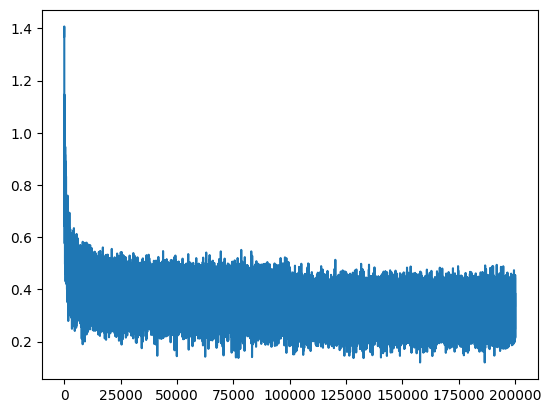

In [277]:
plt.plot(step_i, loss_i)

In [256]:
# training split, dev/validation split, test split
# 80%,                             10%,        10%

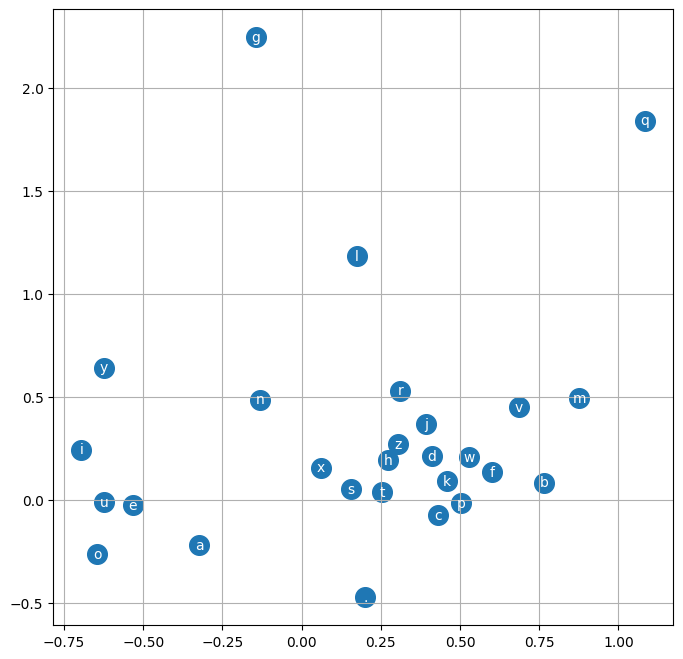

In [257]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [278]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

mora.
kayah.
see.
madhayla.
remmastendraeg.
adelyn.
elin.
shy.
jenrekeiseananar.
katelvinta.
cayshub.
ridhiriel.
kindreth.
khanthulanu.
zey.
dariyah.
fael.
yuma.
myah.
yam.
